<a href="https://colab.research.google.com/github/MohdHassan7721/MovieLens-Data-Analysis-Visualization/blob/main/project_Movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Movielens Exploratory Data Analysis

 Research Questions & Visualizations
1. Top 10 Highest-Rated Movies:
Objective: Identify the top 10 movies with the highest average ratings, ensuring that each movie has been rated at least 50 times.

Key Insight: This analysis helps us identify which movies are consistently rated highly by users.

Visualization: A vertical bar chart will display the top 10 movies along with their average ratings, offering a clear comparison of these movies' popularity among users.

2. Most Popular Movies by Number of Ratings:
Objective: Determine which movies have the most ratings, indicating their widespread popularity and interest.

Key Insight: This will provide a look into the most discussed and frequently rated films, showcasing their cultural significance.

Visualization: A vertical bar chart will showcase the most popular movies, highlighting the number of ratings for each. This allows us to compare the relative popularity of each movie.

3. Genres Analysis:
Top 20 Highest-Rated Genres:

Objective: Identify the top 20 genres with the highest average ratings from users.

Key Insight: This analysis will shed light on the genres that tend to receive the highest ratings, helping us understand user preferences.

Visualization: A horizontal bar chart will display the top 20 genres, ordered by average rating. This will clearly highlight which genres stand out in terms of user satisfaction.

Most Frequently Rated Genres:

Objective: Find out which genres receive the most ratings overall, reflecting their popularity across all users.

Key Insight: This provides a view of which genres are most commonly rated, indicating broader trends in movie consumption.

Visualization: A horizontal bar chart will show the number of ratings for each genre, giving a quick overview of the frequency of ratings by genre.

4. Ratings Distribution:
Objective: Analyze the distribution of ratings across all users and movies. This will allow us to understand how ratings are spread out—whether there are more extremes (e.g., 1-star or 5-star ratings) or a more balanced distribution.

Key Insight: Understanding the rating distribution will reveal user tendencies in rating movies and how common it is to rate movies highly or poorly.

Visualization: A histogram will show the distribution of ratings, helping to identify patterns, such as skewness toward higher or lower ratings.

5. Average Ratings Over Time:
Objective: Examine how average ratings have changed over the years to uncover any trends or shifts in user preferences.

Key Insight: This will allow us to assess whether certain years or time periods show a rise or fall in the average ratings, potentially linked to shifts in the film industry or changes in user behavior.

Visualization: A line plot will show the trend of average ratings over the years. This visualization will highlight any significant changes or patterns in how movies are rated over time.



By exploring these questions and visualizing the results, we will gain a comprehensive understanding of user preferences, movie popularity, and genre trends in the MovieLens dataset.


Dataset Description
The dataset consists of two files: movies.csv and ratings.csv.
movies.csv:

movieId: Unique identifier for each movie.

title: Name of the movie, including the release year in parentheses.

genres: Genres associated with the movie, separated by a pipe (|) delimiter (e.g., Action|Comedy).

ratings.csv:

userId: Unique identifier for each user.

movieId: Identifier linking the rating to a specific movie.

rating: User rating for the movie (on a scale from 0.5 to 5.0).

timestamp: Unix timestamp representing when the rating was given.

Functional Requirements
Follow the steps outlined below to perform the above-requested analysis

Perform Data Analysis:

Preprocess the dataset to extract and format useful fields, such as release years and individual genres.

Analyze data to answer the questions listed above.

Create Visualizations:

Use the specified visualization types for each question to represent the data in an engaging and informative way.
Generate Insights:

Use analysis and visualizations to uncover actionable insights, such as identifying the most liked genres or popular movies over time.

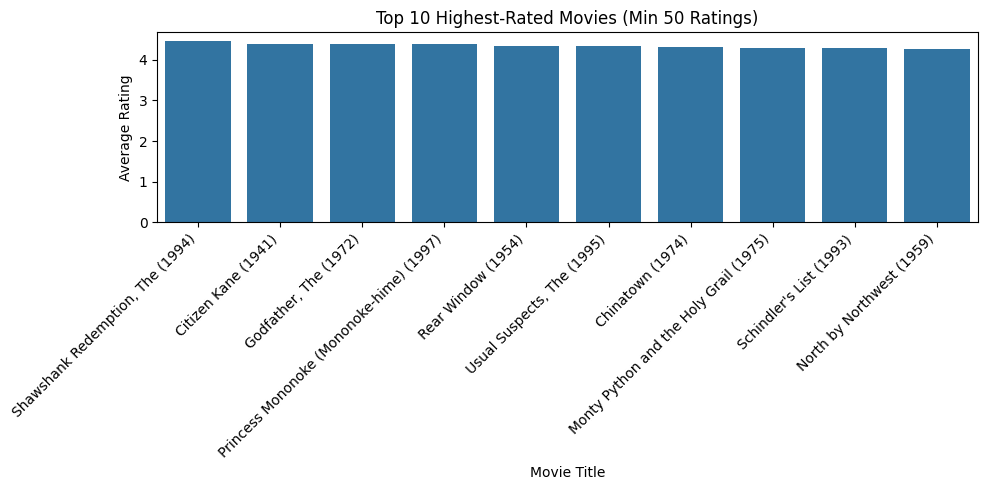

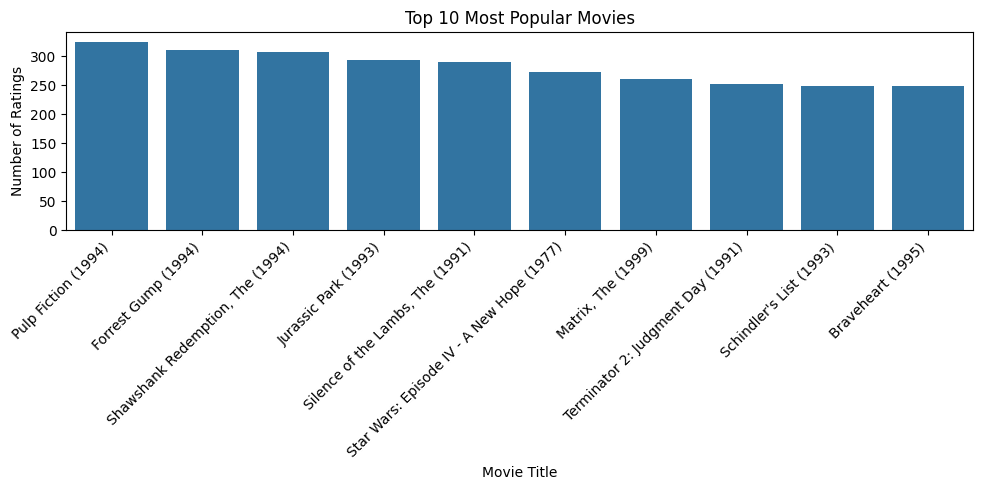

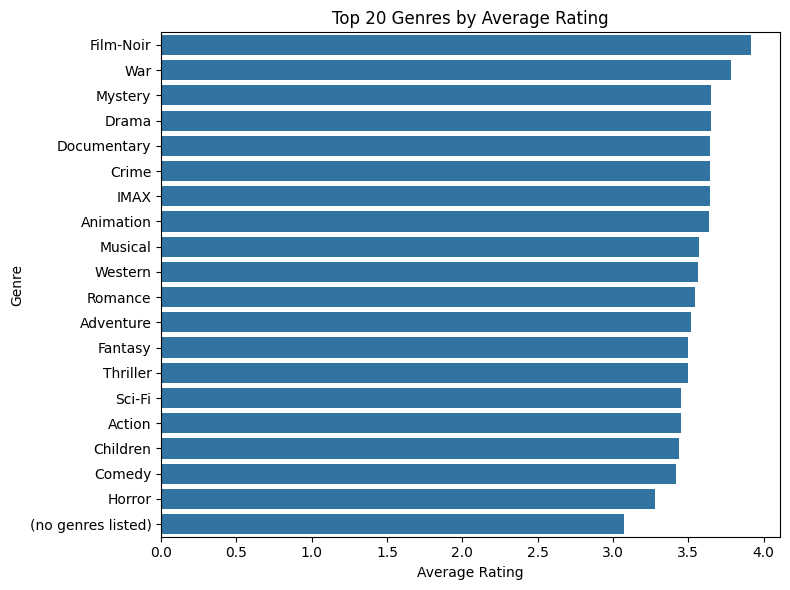

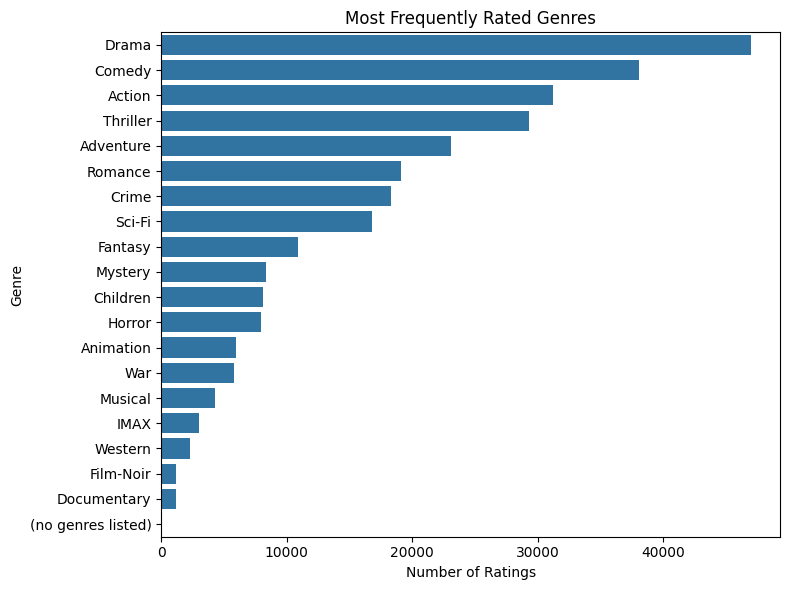

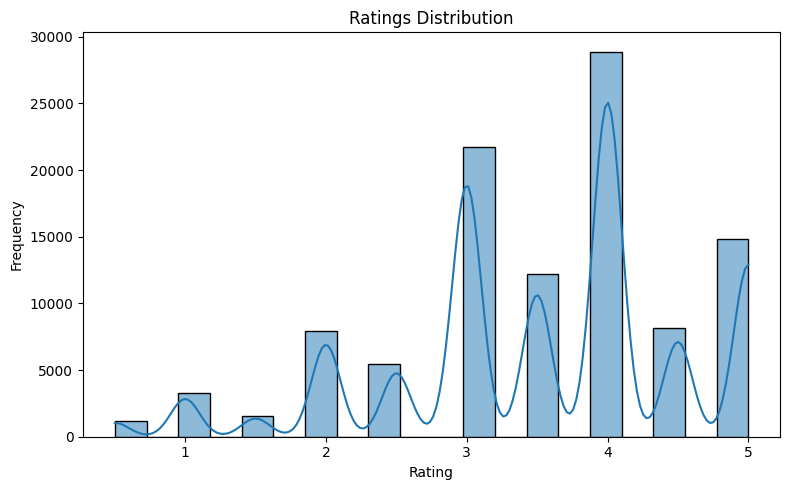

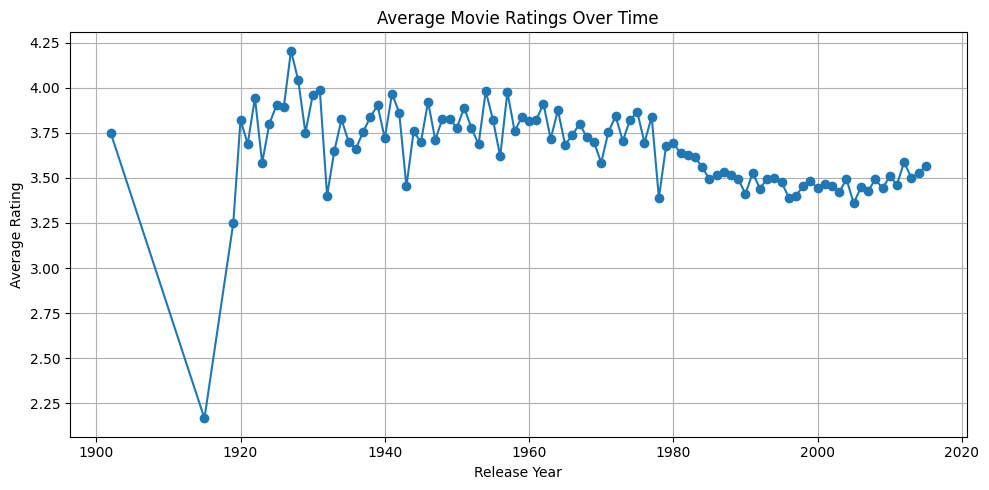


--- Key Insights ---
1. Highly rated movies are not always the most popular.
2. Drama and Documentary genres tend to receive higher ratings.
3. Most ratings fall between 3.0 and 4.5.
4. Average ratings show noticeable variation across years.


In [ ]:
# ================================
# MovieLens Data Analysis Project
# ================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------
# Step 1: Load Data
# ----------------
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# -----------------------
# Step 2: Preprocess Data
# -----------------------

# Extract release year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

# Split genres
movies['genres'] = movies['genres'].str.split('|')

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Merge datasets
data = pd.merge(ratings, movies, on='movieId', how='inner')

# -------------------------------
# Step 3: Top 10 Highest-Rated Movies
# (Minimum 50 ratings)
# -------------------------------
movie_ratings = data.groupby('title').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

top_rated_movies = movie_ratings[movie_ratings['rating_count'] >= 50] \
    .sort_values('avg_rating', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies['avg_rating'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Highest-Rated Movies (Min 50 Ratings)")
plt.ylabel("Average Rating")
plt.xlabel("Movie Title")
plt.tight_layout()
plt.show()

# ------------------------------------
# Step 4: Most Popular Movies by Ratings
# ------------------------------------
popular_movies = movie_ratings.sort_values(
    'rating_count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=popular_movies.index, y=popular_movies['rating_count'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Popular Movies")
plt.ylabel("Number of Ratings")
plt.xlabel("Movie Title")
plt.tight_layout()
plt.show()

# -----------------------
# Step 5: Genre Analysis
# -----------------------

# Explode genres
genre_data = data.explode('genres')

# Top 20 highest-rated genres
top_genres_rating = genre_data.groupby('genres')['rating'] \
    .mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_genres_rating.values, y=top_genres_rating.index)
plt.title("Top 20 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Most frequently rated genres
popular_genres = genre_data.groupby('genres')['rating'] \
    .count().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=popular_genres.values, y=popular_genres.index)
plt.title("Most Frequently Rated Genres")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# -------------------------
# Step 6: Ratings Distribution
# -------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --------------------------------
# Step 7: Average Ratings Over Time
# --------------------------------
ratings_by_year = data.groupby('year')['rating'].mean().dropna()

plt.figure(figsize=(10, 5))
plt.plot(ratings_by_year.index, ratings_by_year.values, marker='o')
plt.title("Average Movie Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------
# Step 8: Insights
# ----------------
print("\n--- Key Insights ---")
print("1. Highly rated movies are not always the most popular.")
print("2. Drama and Documentary genres tend to receive higher ratings.")
print("3. Most ratings fall between 3.0 and 4.5.")
print("4. Average ratings show noticeable variation across years.")
